# 1. Data Collection

In [1]:
import yfinance as yf
import pandas as pd
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the ticker symbol for the stock you want to collect data for
ticker_symbol = 'AAPL'

# Set the date range for the historical data
start_date = '2010-01-01'
end_date = '2022-12-31'

# Collect the historical stock price data using Yahoo Finance API
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Compute daily returns and add them as a new feature
stock_data['daily_returns'] = stock_data['Adj Close'].pct_change()

# Compute the 10-day, 30-day, 50-day, and 200-day moving averages and add them as new features
stock_data['50_day_moving_avg'] = stock_data['Adj Close'].rolling(window=50).mean()
stock_data['10_day_volume_moving_avg'] = stock_data['Volume'].rolling(window=10).mean()
stock_data['30_day_volume_moving_avg'] = stock_data['Volume'].rolling(window=30).mean()
stock_data['200_day_moving_avg'] = stock_data['Adj Close'].rolling(window=200).mean()

# Compute the daily volume and add it as a new feature
stock_data['volume'] = stock_data['Volume']

# Compute the daily high-low percentage difference and add it as a new feature
stock_data['daily_high_low_pct'] = (stock_data['High'] - stock_data['Low']) / stock_data['Low']

# Compute the daily range percentage and add it as a new feature
stock_data['daily_range_pct'] = (stock_data['High'] - stock_data['Low']) / stock_data['Open']

[*********************100%***********************]  1 of 1 completed


In [2]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,2022]
inflation = [1.64004344238989, 3.15684156862206, 2.06933726526059, 1.46483265562714, 1.62222297740821, 0.118627135552435, 1.26158320570537, 2.13011000365963, 2.44258329692818, 1.81221007526015, 1.23358439630637, 4.69785886363739, 8]
inflation_USA = pd.DataFrame({'year': years,'Inflation': inflation})

display(inflation_USA)

,year,Inflation
0,2010,1.640043
1,2011,3.156842
2,2012,2.069337
3,2013,1.464833
4,2014,1.622223
5,2015,0.118627
6,2016,1.261583
7,2017,2.130110
8,2018,2.442583
9,2019,1.812210


In [3]:
gdp_data = {
    'year': ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
    'GDP': [1.56E+13, 1.63E+13, 1.68E+13, 1.76E+13, 1.82E+13, 1.87E+13, 1.95E+13, 2.05E+13, 2.14E+13, 2.11E+13, 2.33E+13, 2.33E+13, 2.546E+13]
}
gdp_df = pd.DataFrame(gdp_data)
display(gdp_df)

,year,GDP
0,2010,1.560000e+13
1,2011,1.630000e+13
2,2012,1.680000e+13
3,2013,1.760000e+13
4,2014,1.820000e+13
5,2015,1.870000e+13
6,2016,1.950000e+13
7,2017,2.050000e+13
8,2018,2.140000e+13
9,2019,2.110000e+13


In [4]:
stock_data['year'] = stock_data.index.year.astype(int)
stock_data.reset_index(inplace=True)
gdp_df['year'] = gdp_df['year'].astype(int)
merged_df = pd.merge(stock_data, gdp_df, on='year')
final = pd.merge(merged_df,inflation_USA, on='year') 
final.set_index('Date', inplace=True)
display(final)

,Open,High,Low,Close,Adj Close,Volume,daily_returns,50_day_moving_avg,10_day_volume_moving_avg,30_day_volume_moving_avg,200_day_moving_avg,volume,daily_high_low_pct,daily_range_pct,year,GDP,Inflation
Date,,,,,,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600,NaN,NaN,NaN,NaN,NaN,493729600,0.009982,0.009933,2010,1.560000e+13,1.640043
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800,0.001729,NaN,NaN,NaN,NaN,601904800,0.010973,0.010904,2010,1.560000e+13,1.640043
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000,-0.015906,NaN,NaN,NaN,NaN,552160000,0.021257,0.020898,2010,1.560000e+13,1.640043
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392177,477131200,-0.001849,NaN,NaN,NaN,NaN,477131200,0.014112,0.013932,2010,1.560000e+13,1.640043
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800,0.006648,NaN,NaN,NaN,NaN,447610800,0.014063,0.013980,2010,1.560000e+13,1.640043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900,-0.002798,143.640676,89034930.0,7.712076e+07,151.326928,63814900,0.021444,0.021234,2022,2.546000e+13,8.000000
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800,-0.013878,143.478730,88889440.0,7.628836e+07,151.207261,69007800,0.020898,0.020475,2022,2.546000e+13,8.000000
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674019,85438400,-0.030685,143.156984,88044660.0,7.669050e+07,151.088099,85438400,0.040995,0.039793,2022,2.546000e+13,8.000000


In [5]:
# Compute the relative strength index (RSI) and add it as a new feature
close_price_delta = final['Adj Close'].diff()
gain = close_price_delta.where(close_price_delta > 0, 0)
loss = -close_price_delta.where(close_price_delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
final['rsi'] = rsi

### RSI: Relative Strength Index - average gains and losses of the asset over a given time period
### EMA : Exponential Moving Average.

final['ema'] = final['Adj Close'].ewm(span=20, adjust=False).mean()

In [6]:
display(final)

,Open,High,Low,Close,Adj Close,Volume,daily_returns,50_day_moving_avg,10_day_volume_moving_avg,30_day_volume_moving_avg,200_day_moving_avg,volume,daily_high_low_pct,daily_range_pct,year,GDP,Inflation,rsi,ema
Date,,,,,,,,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600,NaN,NaN,NaN,NaN,NaN,493729600,0.009982,0.009933,2010,1.560000e+13,1.640043,NaN,6.496294
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800,0.001729,NaN,NaN,NaN,NaN,601904800,0.010973,0.010904,2010,1.560000e+13,1.640043,NaN,6.497363
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000,-0.015906,NaN,NaN,NaN,NaN,552160000,0.021257,0.020898,2010,1.560000e+13,1.640043,NaN,6.488473
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392177,477131200,-0.001849,NaN,NaN,NaN,NaN,477131200,0.014112,0.013932,2010,1.560000e+13,1.640043,NaN,6.479302
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800,0.006648,NaN,NaN,NaN,NaN,447610800,0.014063,0.013980,2010,1.560000e+13,1.640043,NaN,6.475052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900,-0.002798,143.640676,89034930.0,7.712076e+07,151.326928,63814900,0.021444,0.021234,2022,2.546000e+13,8.000000,26.261667,138.808171
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800,-0.013878,143.478730,88889440.0,7.628836e+07,151.207261,69007800,0.020898,0.020475,2022,2.546000e+13,8.000000,27.960310,137.936196
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674019,85438400,-0.030685,143.156984,88044660.0,7.669050e+07,151.088099,85438400,0.040995,0.039793,2022,2.546000e+13,8.000000,26.152376,136.768370


Best subset of size 1: ('ema',), score = 7.35
Best subset of size 2: ('rsi', 'ema'), score = 4.90
Best subset of size 3: ('50_day_moving_avg', 'rsi', 'ema'), score = 3.78
Best subset of size 4: ('daily_returns', '50_day_moving_avg', 'rsi', 'ema'), score = 3.40
Best subset of size 5: ('daily_returns', '50_day_moving_avg', 'rsi', 'ema', 'Inflation'), score = 3.37
Best subset of size 6: ('daily_returns', '50_day_moving_avg', 'daily_high_low_pct', 'rsi', 'ema', 'Inflation'), score = 3.35
Best subset of size 7: ('daily_returns', '50_day_moving_avg', 'daily_high_low_pct', '30_day_volume_moving_avg', 'rsi', 'ema', 'Inflation'), score = 3.33
Best subset of size 8: ('daily_returns', '50_day_moving_avg', '200_day_moving_avg', 'daily_high_low_pct', '30_day_volume_moving_avg', 'rsi', 'ema', 'Inflation'), score = 3.29
Best subset of size 9: ('daily_returns', '50_day_moving_avg', '200_day_moving_avg', 'volume', 'daily_high_low_pct', '30_day_volume_moving_avg', 'rsi', 'ema', 'Inflation'), score = 3.2

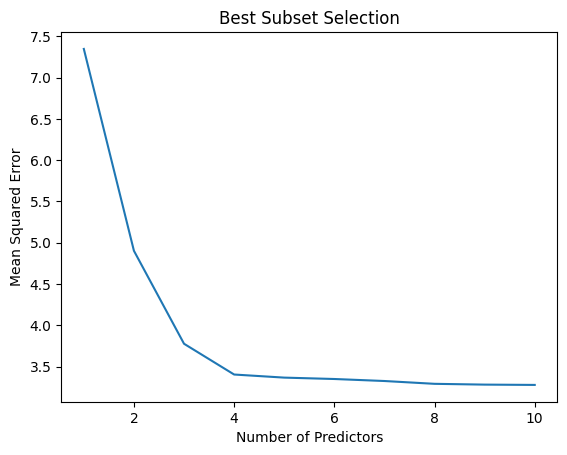

In [7]:
target_variable = 'Adj Close'
predictors = ['daily_returns', '50_day_moving_avg', '200_day_moving_avg', 'volume', 'daily_high_low_pct', '10_day_volume_moving_avg', '30_day_volume_moving_avg','rsi', 'ema', 'GDP', 'Inflation']

max_features = 10

metric = mean_squared_error

best_subset = None
best_score = float('inf')

best_scores = []
ks = []

for k in range(1, max_features + 1):
    subsets = itertools.combinations(predictors, k)
    
    for subset in subsets:
        X = final[list(subset)].dropna()
        y = final[target_variable].loc[X.index]
        model = LinearRegression().fit(X, y)
        
        y_pred = model.predict(X)
        score = metric(y, y_pred)
        
        if score < best_score:
            best_subset = subset
            best_score = score

    best_scores.append(best_score)
    ks.append(k)           
            
    print(f'Best subset of size {k}: {best_subset}, score = {best_score:.2f}')

import matplotlib.pyplot as plt

plt.plot(ks, best_scores)
plt.xlabel('Number of Predictors')
plt.ylabel('Mean Squared Error')
plt.title('Best Subset Selection')
plt.show()

In [8]:
# use ('50_day_moving_avg', 'rsi', 'ema')
final = final.dropna()
X = final[['50_day_moving_avg', 'rsi', 'ema']]
y = final['Adj Close']
linearmodel = LinearRegression()

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
linearmodel.fit(x_train, y_train) 

LinearRegression()

In [10]:
y_predict = linearmodel.predict(x_test)

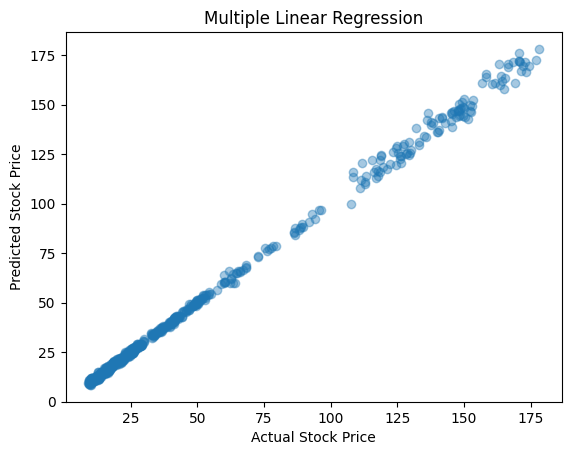

In [11]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Stock Price")
plt.ylabel("Predicted Stock Price")
plt.title("Multiple Linear Regression")
plt.show()

In [12]:
print(linearmodel.coef_)
print(linearmodel.score(x_train, y_train))
print(linearmodel.score(x_test, y_test))

[-0.40372447  0.0700786   1.40404303]
0.9982983215747323
0.9983267961287927


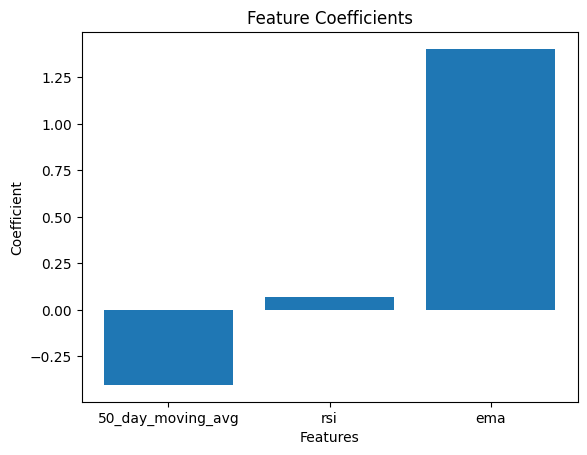

In [13]:
import numpy as np

# Get the coefficients of the linear regression model
coefficients = linearmodel.coef_

# Create a bar chart of the coefficients
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), ['50_day_moving_avg', 'rsi', 'ema'])
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients')

# Show the plot
plt.show()

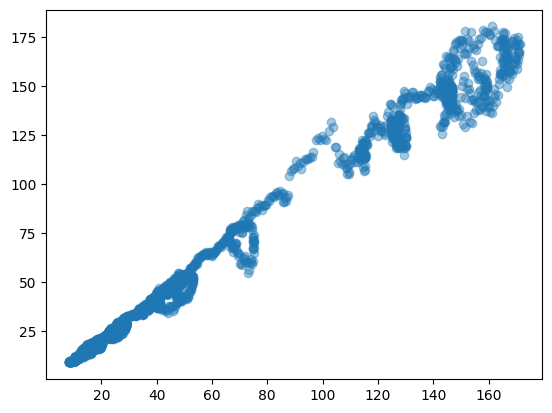

In [14]:
plt.scatter(final[['50_day_moving_avg']], final[['Adj Close']], alpha=0.4)
plt.show()

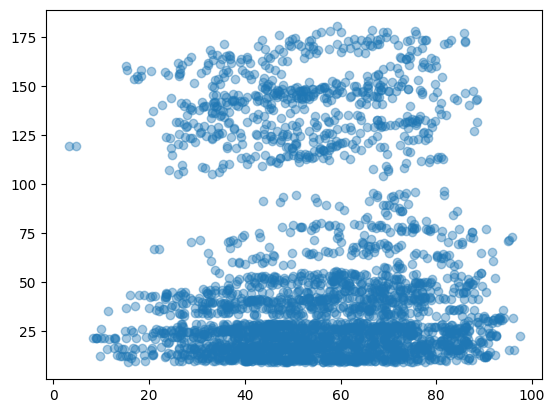

In [15]:
plt.scatter(final[['rsi']], final[['Adj Close']], alpha=0.4)
plt.show()

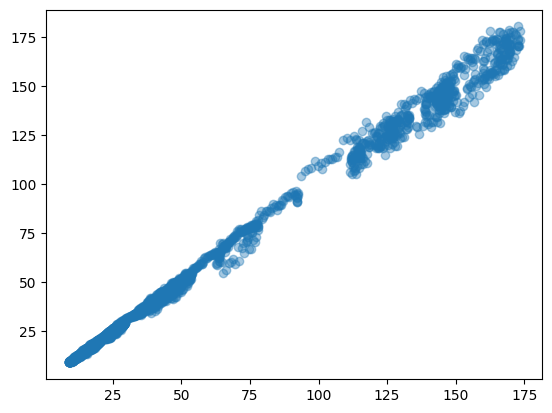

In [16]:
plt.scatter(final[['ema']], final[['Adj Close']], alpha=0.4)
plt.show()

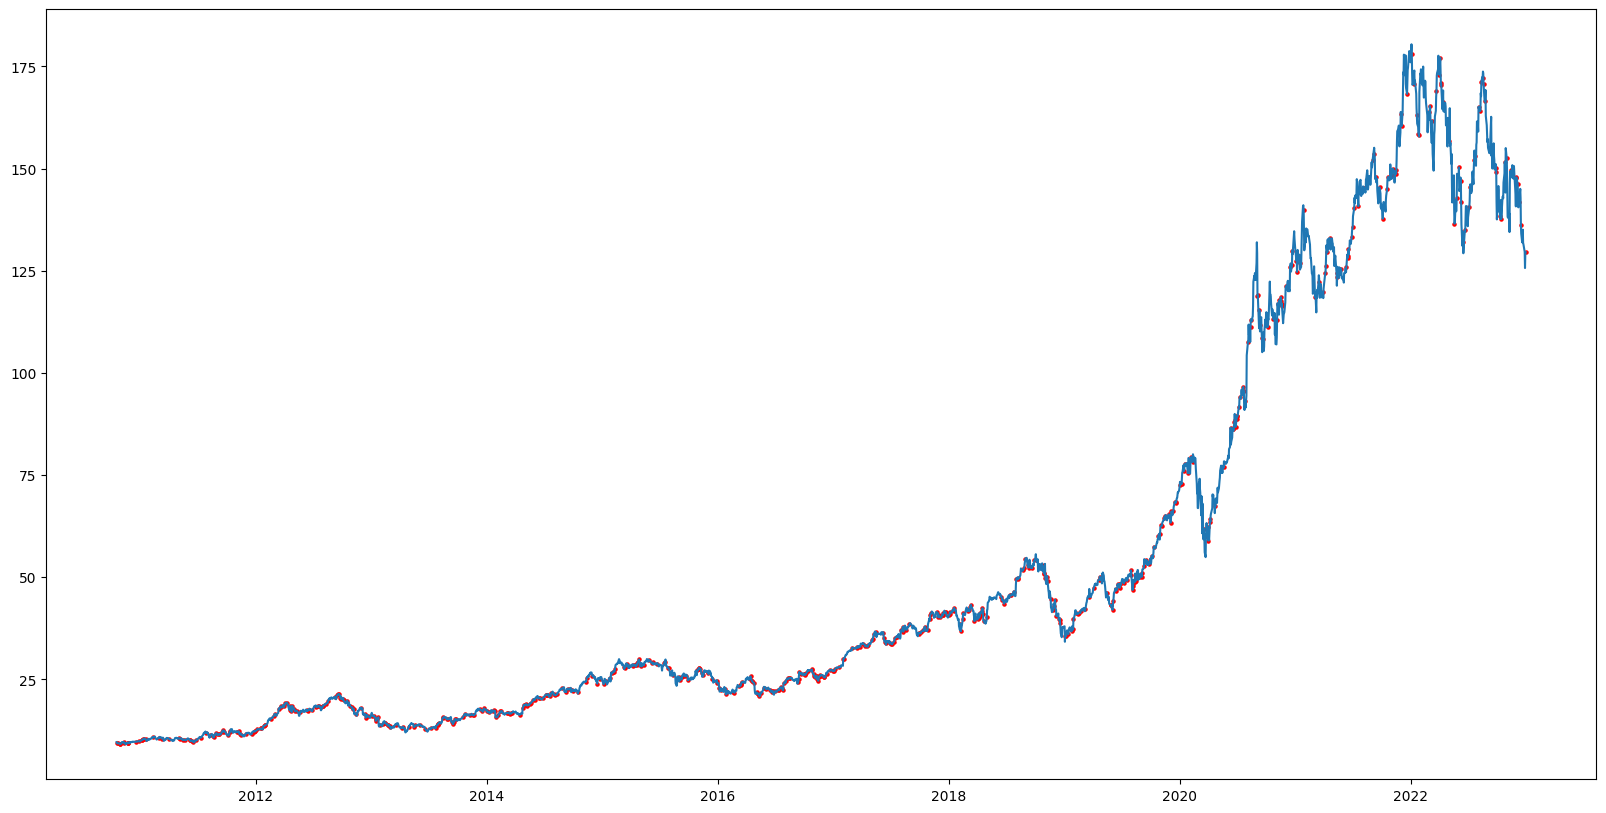

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(final.index, final['Adj Close'], label='Actual')
plt.scatter(y_test.index, y_test, color='r', label='Predicted', s=5)

# 2. Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [20]:
final = final.dropna()
X = final[['daily_returns', '50_day_moving_avg', '200_day_moving_avg', 'volume', 'daily_high_low_pct', '10_day_volume_moving_avg', '30_day_volume_moving_avg','rsi', 'ema', 'GDP', 'Inflation']]
y = final['Adj Close']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=150)

In [23]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=150)

In [24]:
y_pred = rf.predict(X_test)

In [25]:
import numpy as np
final = final.dropna()

target_variable = 'Adj Close'
predictors =['daily_returns', '50_day_moving_avg', '200_day_moving_avg', 'volume', 'daily_high_low_pct', '10_day_volume_moving_avg', '30_day_volume_moving_avg','rsi', 'ema', 'GDP', 'Inflation']

max_features = 10

metric = mean_squared_error

best_subset = None
best_score = float('inf')

best_scores = []
ks = []

for k in range(1, max_features + 1):
    subsets = itertools.combinations(predictors, k)
    
    for subset in subsets:
        X = final[list(subset)].dropna()
        y = final[target_variable].loc[X.index]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=150)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_test)
        score = metric(y_test, y_pred)
        
        if score < best_score:
            best_subset = subset
            best_score = score

    best_scores.append(best_score)
    ks.append(k)
            
    print(f'Best subset of size {k}: {best_subset}, score = {best_score:.2f}')

best_k = np.argmin(best_scores) + 1
best_subset = list(itertools.combinations(predictors, best_k))[np.argmin(best_scores)]
print(f'Best subset of features: {best_subset}, with {best_k} features and score = {min(best_scores):.2f}')

Best subset of size 1: ('ema',), score = 9.18
Best subset of size 2: ('rsi', 'ema'), score = 4.74
Best subset of size 3: ('volume', 'rsi', 'ema'), score = 4.62
Best subset of size 4: ('200_day_moving_avg', 'volume', 'rsi', 'ema'), score = 4.56
Best subset of size 5: ('50_day_moving_avg', '200_day_moving_avg', 'volume', 'rsi', 'ema'), score = 4.54
Best subset of size 6: ('50_day_moving_avg', '200_day_moving_avg', 'volume', '10_day_volume_moving_avg', 'rsi', 'ema'), score = 4.53
Best subset of size 7: ('50_day_moving_avg', '200_day_moving_avg', 'volume', '10_day_volume_moving_avg', 'rsi', 'ema', 'Inflation'), score = 4.53
Best subset of size 8: ('50_day_moving_avg', '200_day_moving_avg', 'volume', '10_day_volume_moving_avg', 'rsi', 'ema', 'Inflation'), score = 4.53
Best subset of size 9: ('50_day_moving_avg', '200_day_moving_avg', 'volume', '10_day_volume_moving_avg', 'rsi', 'ema', 'Inflation'), score = 4.53
Best subset of size 10: ('50_day_moving_avg', '200_day_moving_avg', 'volume', '1

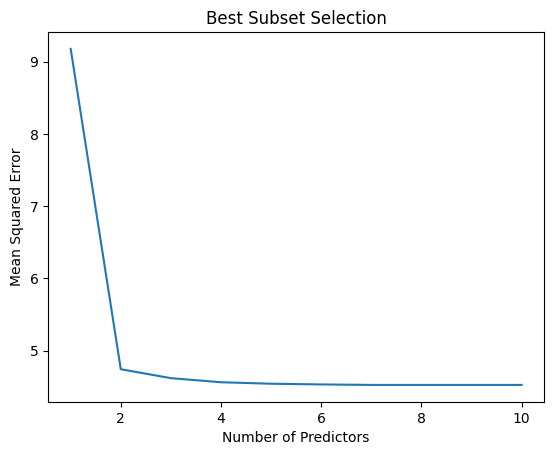

In [26]:
plt.plot(ks, best_scores)
plt.xlabel('Number of Predictors')
plt.ylabel('Mean Squared Error')
plt.title('Best Subset Selection')
plt.show()

In [27]:
target_variable = 'Adj Close'
predictors =['50_day_moving_avg', '200_day_moving_avg', 'volume', '10_day_volume_moving_avg', 'rsi', 'ema', 'Inflation']

X = final[predictors]
y = final[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

metric = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(RandomForestRegressor(random_state=150),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring=metric)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}
Best score:  -2.129045140060911


In [28]:
rf = RandomForestRegressor(n_estimators=100, max_depth=9, random_state=150, max_features='sqrt', min_samples_leaf=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', random_state=150)

In [29]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.2f}")

MSE: 2.14
R^2: 1.00


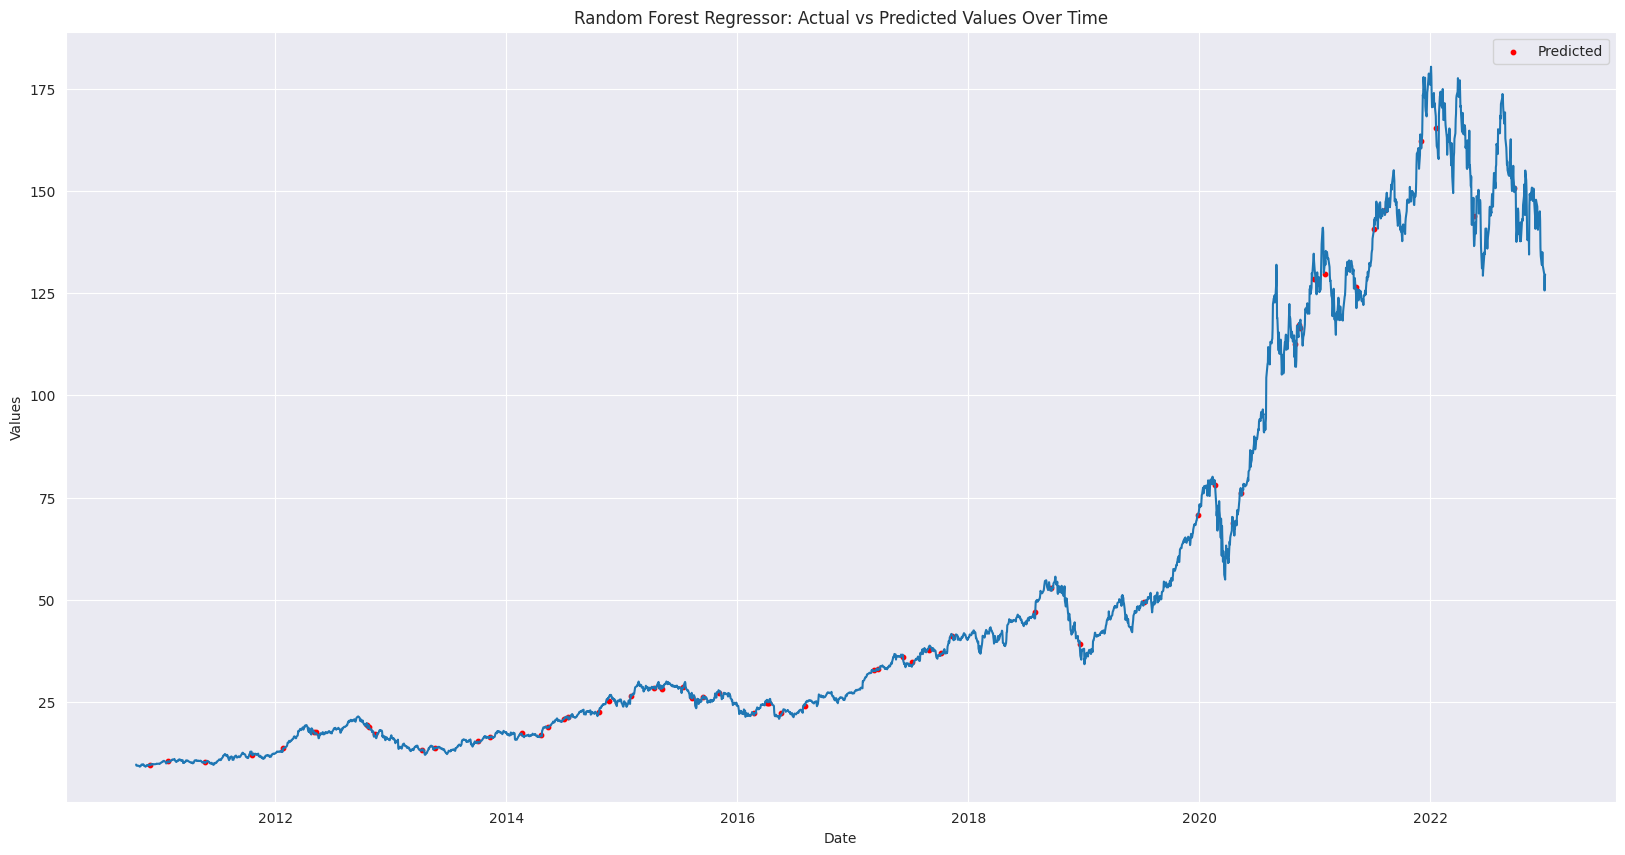

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

plt.figure(figsize=(20, 10))

# create a time series plot of the actual values
plt.plot(final['Adj Close'])

# create scatter plots of some predicted values
plt.scatter(X_test.index[::10], y_pred[::10], color='r', label='Predicted', s=10)

# add labels and legend
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Random Forest Regressor: Actual vs Predicted Values Over Time')
plt.legend()
plt.show()

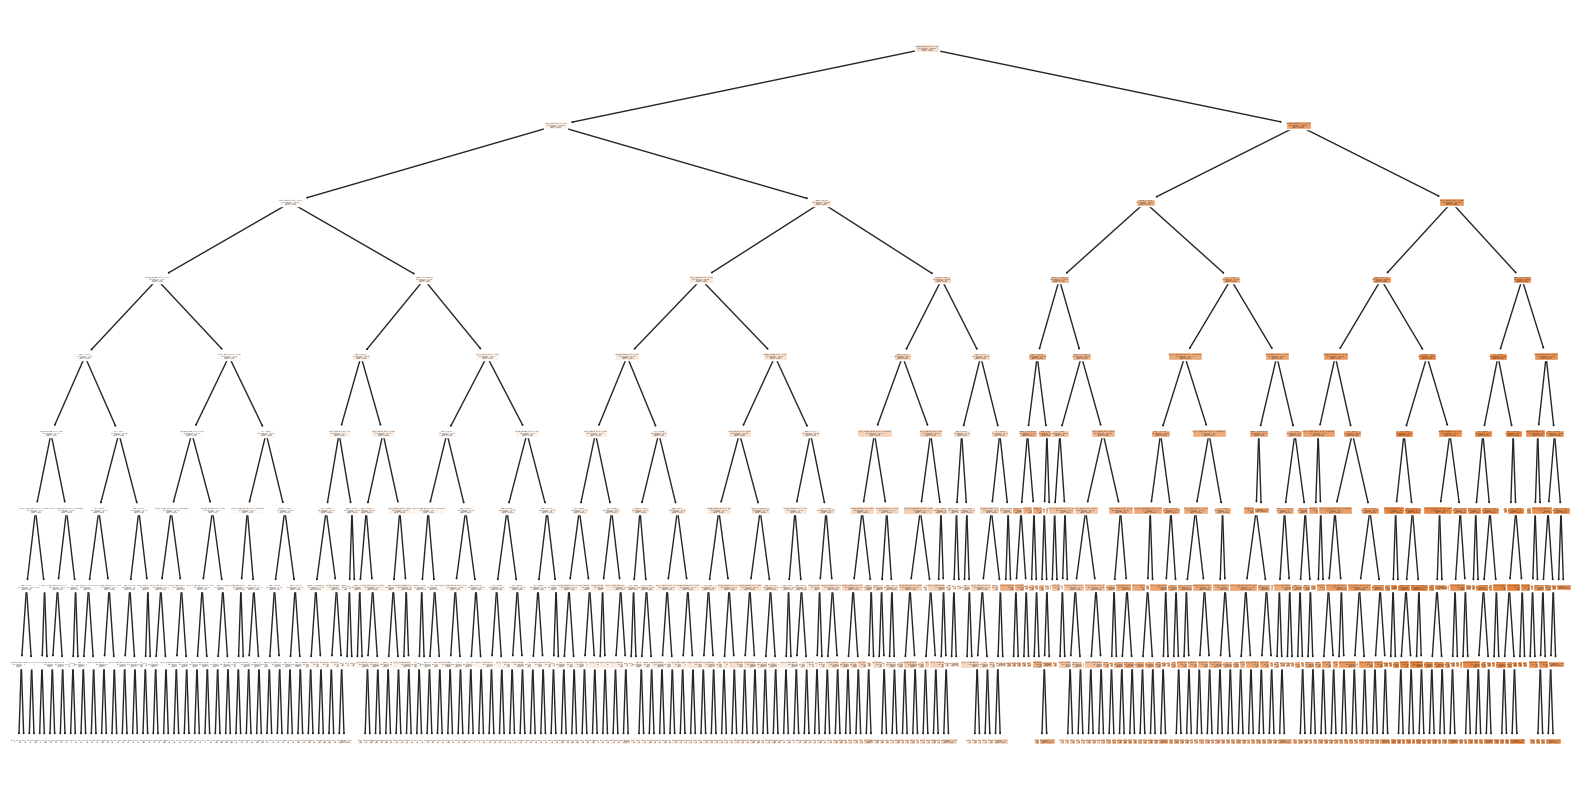

In [31]:
from sklearn.tree import plot_tree

# Visualize first decision tree in Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)
plt.show()

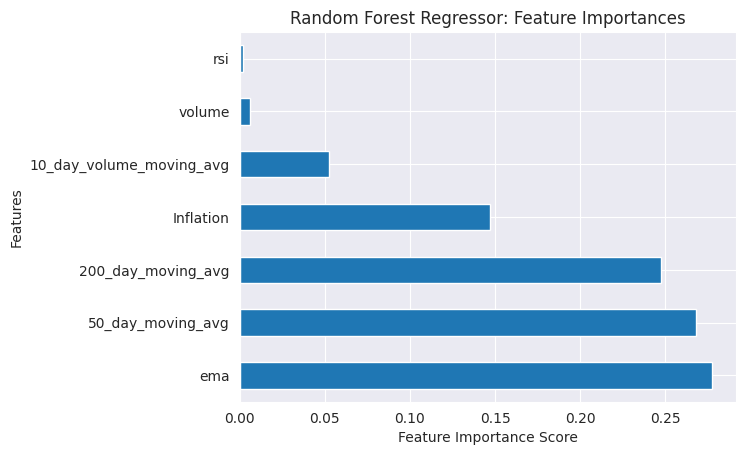

In [32]:
import pandas as pd

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Random Forest Regressor: Feature Importances')
plt.show()

# 3. LSTM

In [33]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [34]:
# Split the data into training and test sets
train_size = int(len(final) * 0.8)
train_data, test_data = final.iloc[0:train_size], final.iloc[train_size:len(final)]

In [35]:
# Select the features and target
X = final[['daily_returns', '50_day_moving_avg', 'daily_high_low_pct', 'ema', 'Inflation']].values
y = final['Adj Close'].values.reshape(-1, 1)

In [36]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.model_selection import train_test_split

# define input features and target output
X = final[['daily_returns', '50_day_moving_avg', 'daily_high_low_pct', 'ema', 'Inflation']]
y = final['Adj Close']

# define number of timesteps
n_steps = 3
n_samples = X.shape[0]

# convert input features to numpy array
X = np.array(X)

# create empty 3D array to hold reshaped input
X_3D = np.empty((n_samples, n_steps, X.shape[1]))

# loop over samples and create timesteps
for i in range(n_samples):
    for j in range(n_steps):
        # check if there are enough past observations to create a full timestep
        if i - j >= 0:
            X_3D[i, j, :] = X[i - j, :]
        else:
            X_3D[i, j, :] = np.zeros(X.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X_3D, y, test_size=0.2, random_state=42)

In [43]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

def create_model(units=10, activation='relu'):
    model = Sequential()
    model.add(LSTM(units, activation=activation, input_shape=(3, 5)))
    model.add(Dense(5))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=1, verbose=0)

param_grid = {
    'units': [5, 10, 15],
    'activation': ['relu', 'tanh']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best score:", grid_result.best_score_)
print("Best parameters:", grid_result.best_params_)

<ipython-input-43-b63bfba6a349>:15: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=1, verbose=0)


Best score: -4.59292197227478
Best parameters: {'activation': 'relu', 'units': 15}


In [44]:
model = Sequential()
model.add(LSTM(15, activation = 'relu', input_shape=(3,5)))
model.add(Dense(5))
model.add(Dense(1))
 
model.summary()

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 15)                1260      
                                                                 
 dense_4 (Dense)             (None, 5)                 80        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,346
Trainable params: 1,346
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2458/2458 [==============================] - 7s 2ms/step - loss: 136.0074
Epoch 2/100
2458/2458 [==============================] - 7s 3ms/step - loss: 14.9564
Epoch 3/100
2458/2458 [==============================] - 7s 3ms/step - loss: 14.0690
Epoch 4/100
2458/2458 [==============================] - 6s 

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# make predictions on test set
y_pred = model.predict(X_test)

# calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print metrics
print("MSE: ", mse)
print("R^2: ", r2)

20/20 [==============================] - 0s 2ms/step
MSE:  4.8348006671960855
R^2:  0.9980348141995617


Sentiment Analysis

In [50]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.downloader.download('vader_lexicon')
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finviz_url = 'https://finviz.com/quote.ashx?t='

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [52]:
news_tables = {}
tickers = ['AAPL']

for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [53]:
aapl = news_tables['AAPL']

aapl_tr = aapl.findAll('tr')

for i, table_row in enumerate(aapl_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text' 
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break

GuruFocus Feature Update: Balance Sheet and Cash Flow Statement Charts
May-12-23 04:46PM
Apple reportedly set to unveil its mixed-reality headset
04:08PM
AI Initiatives  And This Business  Have Google Stock On Cloud 9
04:08PM
Stock Picks: Apple, Nvidia Reveal 7 Telltale Traits For How To Invest In Stocks
03:53PM


In [54]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AAPL',
  'May-12-23',
  '04:46PM',
  'May-12-23 04:46PMGuruFocus Feature Update: Balance Sheet and Cash Flow Statement Charts(GuruFocus.com)'],
 ['AAPL',
  'May-12-23',
  '04:08PM',
  '04:08PMApple reportedly set to unveil its mixed-reality headset(Yahoo Finance Video)'],
 ['AAPL',
  'May-12-23',
  '04:08PM',
  "04:08PMAI Initiatives  And This Business  Have Google Stock On Cloud 9(Investor's Business Daily)"],
 ['AAPL',
  'May-12-23',
  '03:53PM',
  "03:53PMStock Picks: Apple, Nvidia Reveal 7 Telltale Traits For How To Invest In Stocks(Investor's Business Daily)"],
 ['AAPL',
  'May-12-23',
  '03:06PM',
  '03:06PM10 Biggest & Most Valuable Companies in the World(Investopedia)'],
 ['AAPL',
  'May-12-23',
  '02:44PM',
  "02:44PMBest Dow Jones Stocks To Buy And Watch In May 2023: Apple, Microsoft Slide(Investor's Business Daily)"],
 ['AAPL',
  'May-12-23',
  '01:00PM',
  '01:00PMGM should not force Apple CarPlay out of the front seat(Financial Times)'],
 ['AAPL',
  'May-12-23',
  '12:4

In [55]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()
# Set column names
columns = ['ticker', 'date', 'time', 'headline']
# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)
# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()
# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)
# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')
# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date
parsed_and_scored_news.head()


,ticker,date,time,headline,neg,neu,pos,compound
0,AAPL,2023-05-12,04:46PM,May-12-23 04:46PMGuruFocus Feature Update: Bal...,0.0,1.000,0.000,0.0000
1,AAPL,2023-05-12,04:08PM,04:08PMApple reportedly set to unveil its mixe...,0.0,1.000,0.000,0.0000
2,AAPL,2023-05-12,04:08PM,04:08PMAI Initiatives And This Business Have...,0.0,1.000,0.000,0.0000
3,AAPL,2023-05-12,03:53PM,"03:53PMStock Picks: Apple, Nvidia Reveal 7 Tel...",0.0,1.000,0.000,0.0000
4,AAPL,2023-05-12,03:06PM,03:06PM10 Biggest & Most Valuable Companies in...,0.0,0.674,0.326,0.5256


<ipython-input-56-17cb3282c609>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()


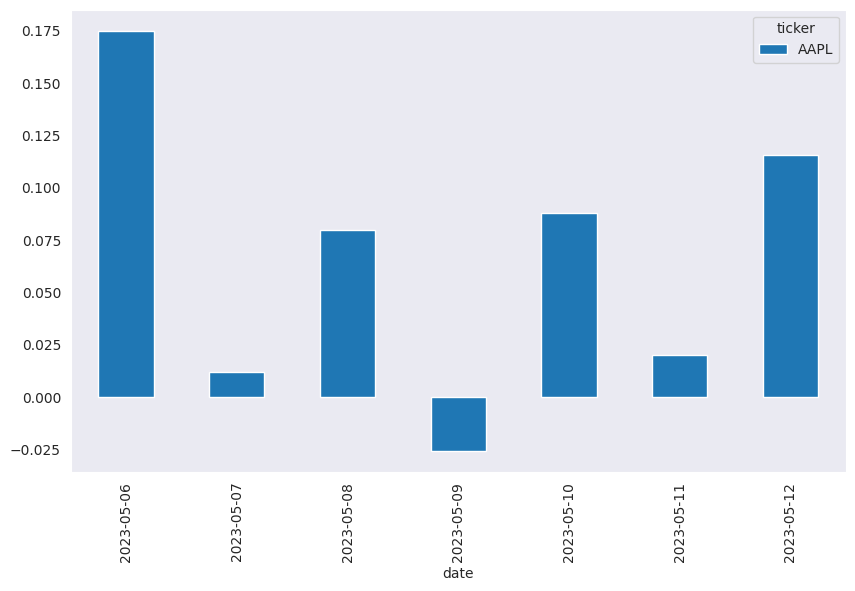

In [56]:
plt.rcParams['figure.figsize'] = [10, 6]
# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()
# Unstack the column ticker
mean_scores = mean_scores.unstack()
# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()
# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()